In [11]:
from typing import Tuple
import pandas as pd
import sklearn
import torch
import torch.optim as optim
from torch import nn
import numpy as np
import kagglehub 
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

file_path = "heart.csv"

df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS, "fedesoriano/heart-failure-prediction", file_path)

In [12]:
print("Pierwsze 5 wierszy: \n", df.head())
print("Podstawowe informacje: \n")
df.info()

Pierwsze 5 wierszy: 
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Podstawowe informacje: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  -----

In [13]:
df["Sex"].value_counts()
df["ChestPainType"].value_counts()
df["RestingECG"].value_counts()
df["ExerciseAngina"].value_counts()
df["ST_Slope"].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [14]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


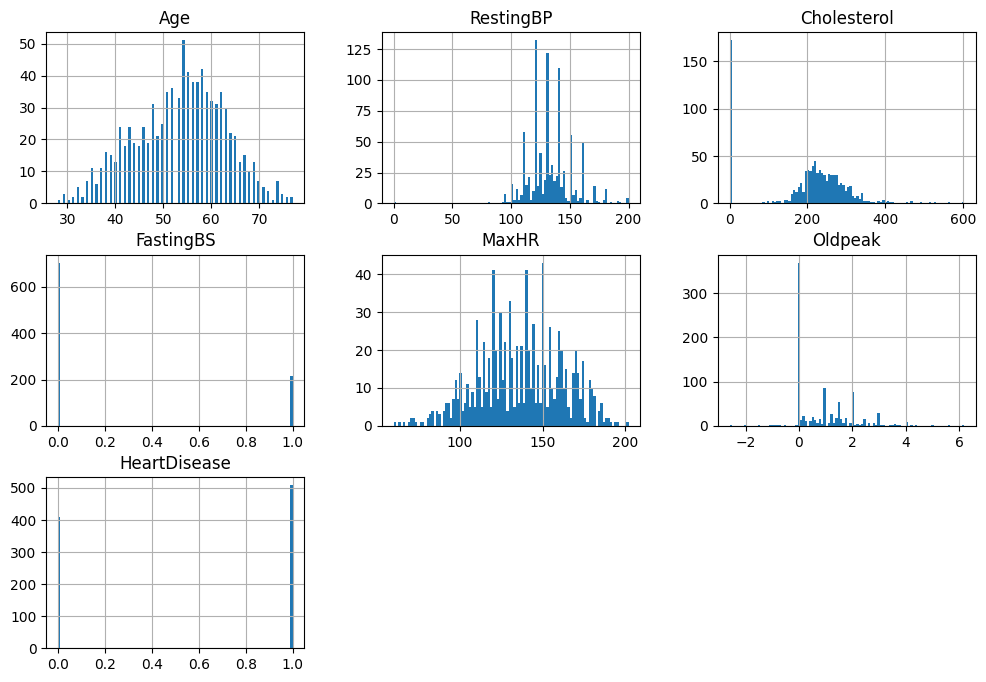

In [15]:
df.hist(bins=100, figsize=(12, 8))
plt.show()

<Axes: xlabel='HeartDisease'>

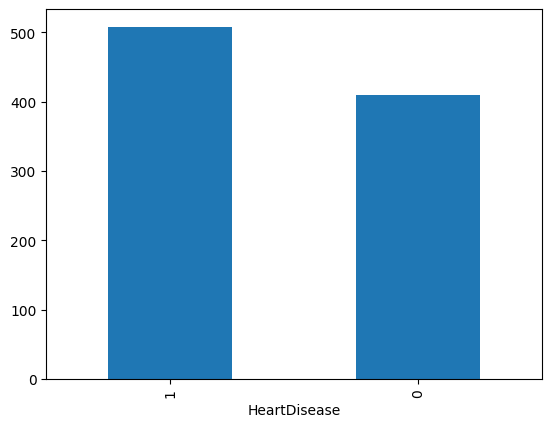

In [16]:
df["HeartDisease"].value_counts().plot(kind="bar")

In [17]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")
df_onehot = df.select_dtypes(include="object")
ohe_transform = ohe.fit_transform(df_onehot)

In [18]:
df_number = df.select_dtypes(include="number")
df_number = df_number.drop("HeartDisease", axis=1)
df_number.head

<bound method NDFrame.head of      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak
0     40        140          289          0    172      0.0
1     49        160          180          0    156      1.0
2     37        130          283          0     98      0.0
3     48        138          214          0    108      1.5
4     54        150          195          0    122      0.0
..   ...        ...          ...        ...    ...      ...
913   45        110          264          0    132      1.2
914   68        144          193          1    141      3.4
915   57        130          131          0    115      1.2
916   57        130          236          0    174      0.0
917   38        138          175          0    173      0.0

[918 rows x 6 columns]>

In [19]:
scaler = StandardScaler()
df_number_scaled = scaler.fit_transform(df_number)
df_number_scaled = pd.DataFrame(df_number_scaled, columns= ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"])

In [20]:
df_number_scaled.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432


In [21]:
df_concat = pd.concat([df_number_scaled, ohe_transform], axis=1)
df_concat.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [22]:
X = df_concat
y = df["HeartDisease"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_test.shape, X_train.shape, y_test.shape, y_train.shape

((184, 20), (734, 20), (184,), (734,))

In [24]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

print("X_train shape:", X_train_tensor.shape)
print("y_train shape:", y_train_tensor.shape)

X_train shape: torch.Size([734, 20])
y_train shape: torch.Size([734, 1])


In [25]:
class DiseaseClassifier(nn.Module):
    def __init__(self, n_features: int, n_classes: int):
        super().__init__()
        self.linear_layer_1 = nn.Linear(n_features, 8)
        self.linear_layer_2 = nn.Linear(8, n_classes)
    def forward(self, features):
        x = torch.relu(self.linear_layer_1(features))
        return self.linear_layer_2(x)

In [26]:
model = DiseaseClassifier(n_features=20, n_classes=1)

In [27]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Epoka: 0 | Strata (Loss): 0.34772
Epoka: 100 | Strata (Loss): 0.34120
Epoka: 200 | Strata (Loss): 0.33621
Epoka: 300 | Strata (Loss): 0.33228
Epoka: 400 | Strata (Loss): 0.32918
Epoka: 500 | Strata (Loss): 0.32666
Epoka: 600 | Strata (Loss): 0.32461
Epoka: 700 | Strata (Loss): 0.32287
Epoka: 800 | Strata (Loss): 0.32141
Epoka: 900 | Strata (Loss): 0.32014


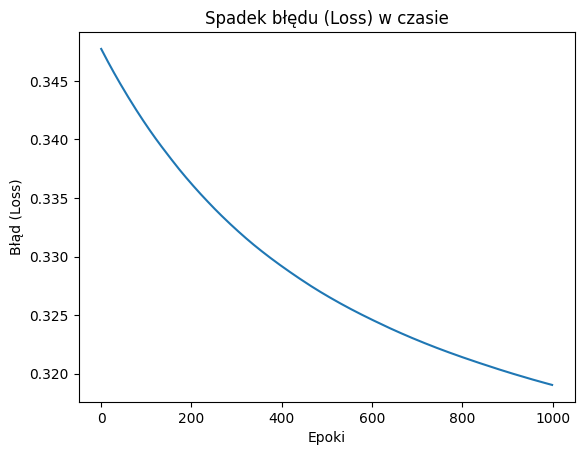

In [31]:
epochs = 1000
loss_values = []
for epoch in range(epochs):
    model.train()

    y_logits = model(X_train_tensor)
    loss = criterion(y_logits, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())

    if epoch % 100 == 0:
       print(f"Epoka: {epoch} | Strata (Loss): {loss.item():.5f}")

plt.plot(loss_values)
plt.title("Spadek błędu (Loss) w czasie")
plt.xlabel("Epoki")
plt.ylabel("Błąd (Loss)")
plt.show()

In [32]:
model.eval()

with torch.no_grad():
    test_logits = model(X_test_tensor)
    test_probs = torch.sigmoid(test_logits)
    test_preds = torch.round(test_probs)

    correct_pred = (test_preds == y_test_tensor).sum().item()
    total_samples = y_test_tensor.size(0)

    accuracy = correct_pred/total_samples

    print(f"Wynik na zbiorze testowym: {accuracy*100:.2f}%")
    print(f"Trafiono {correct_pred} z {total_samples} przypadków.")



Wynik na zbiorze testowym: 85.87%
Trafiono 158 z 184 przypadków.
